

# Project: Investigating tmdb ratings data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project I selected the tmdb-movies data set. I will answer two questions which are Which directors generate more revenue? And List of the most popular director in terms of popularity. i will go throught the data analysis process step by step to try and find answers to my questions.

In [1]:
# First we import the necceseray functions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [2]:
# Now we have to read the data and display it so I can get a better understanding of the columns
df = pd.read_csv('tmdb-movies.csv')
df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# this function helps with seeing the data types and how many null values in the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [4]:
# describe is a great way to see some statistical analysis on numircal columns 
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
# The shape is to determine how many columns and rows in the data set 
df.shape

(10866, 21)



### Data Cleaning (Dropping unneccesry columns and rows)
In this step the unneccesry columns and the null rows should be dropped so we can go to the exploratory step.

In [6]:
#Using the drop function to drop unnecceasry columns
df.drop(['imdb_id','cast','homepage','tagline','keywords','overview','genres','production_companies','release_date','vote_average','release_year','budget_adj','revenue_adj'], axis = 1 , inplace = True)


In [7]:
# Displaying the new data frame
df.head()

,id,popularity,budget,revenue,original_title,director,runtime,vote_count
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,5562
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,6185
2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,2480
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,5292
4,168259,9.335014,190000000,1506249360,Furious 7,James Wan,137,2947


In [8]:
# Info about the new data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10866 non-null  int64  
 1   popularity      10866 non-null  float64
 2   budget          10866 non-null  int64  
 3   revenue         10866 non-null  int64  
 4   original_title  10866 non-null  object 
 5   director        10822 non-null  object 
 6   runtime         10866 non-null  int64  
 7   vote_count      10866 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 679.2+ KB


In [9]:
# Droping the rows with null values 
df.dropna(axis = 0, inplace = True)

In [10]:
df

,id,popularity,budget,revenue,original_title,director,runtime,vote_count
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,5562
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,6185
2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,2480
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,5292
4,168259,9.335014,190000000,1506249360,Furious 7,James Wan,137,2947
...,...,...,...,...,...,...,...,...
10861,21,0.080598,0,0,The Endless Summer,Bruce Brown,95,11
10862,20379,0.065543,0,0,Grand Prix,John Frankenheimer,176,20
10863,39768,0.065141,0,0,Beregis Avtomobilya,Eldar Ryazanov,94,11
10864,21449,0.064317,0,0,"What's Up, Tiger Lily?",Woody Allen,80,22


<a id='eda'></a>
## Exploratory Data Analysis


### Which directors generate more revenue?

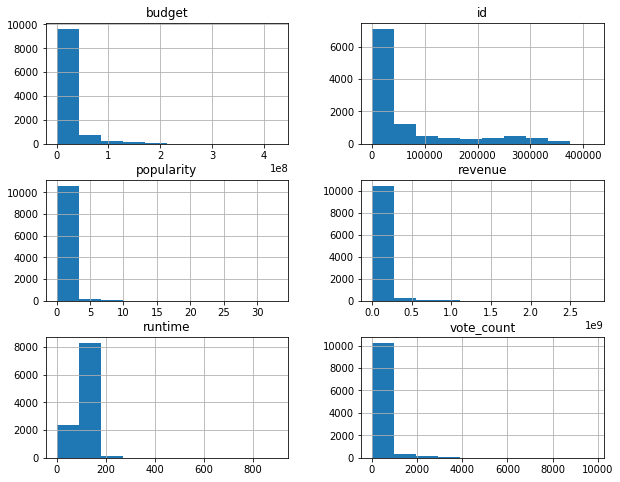

In [11]:
# Visualting the data frame
df.hist(figsize = (10 , 8));


In [12]:
# Here I created a new data frame containing only the director and revenue
# The reason for creating this new data frame is because i can make a graph to visualize the highest revenues achievied by directors 
new_df = df.groupby('director')['revenue'].sum()
new_df.nlargest(n = 15)

director
Steven Spielberg     9018563772
Peter Jackson        6523244659
James Cameron        5841894863
Michael Bay          4917208171
Christopher Nolan    4167548502
David Yates          4154295625
Robert Zemeckis      3869690869
Chris Columbus       3851491668
Tim Burton           3665414624
Ridley Scott         3649996480
J.J. Abrams          3579169916
Gore Verbinski       3548779679
Ron Howard           3484471847
Roland Emmerich      3393325574
George Lucas         3316550893
Name: revenue, dtype: int64

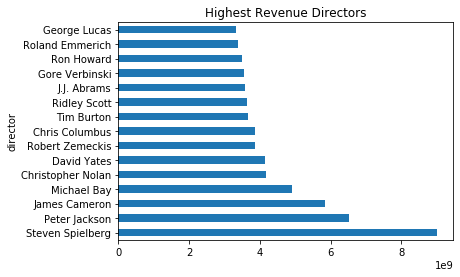

In [18]:
# Creating the bar chart for the top 15 directors by revenue with the x and y labels
dir_list = new_df.nlargest(n = 15)
dir_list.plot(kind = 'barh', title = 'Highest Revenue Directors')
plt.xlabel = ('director')
plt.ylabel = ('revenue' )


In [14]:
# This graph showcases the highest revenue directors and we can see that theres a significant differance between the first 
# position and the rest of the directors, but going down the line we can observe that the directors are very close with earnings.

## Who are the most popular directors?

In [15]:
# Here I created a new data frame containing only the director and popularity
# The reason for creating this new data frame is because i can make a graph to visualize the most popular directors 
new_df2 = df.groupby(by='director')['popularity'].sum()
new_df2.nlargest(n =15)

director
Christopher Nolan    61.955206
Steven Spielberg     54.378995
Peter Jackson        49.067904
Ridley Scott         46.213770
Quentin Tarantino    46.059995
George Miller        35.600006
Tim Burton           34.648225
David Fincher        34.479784
Robert Zemeckis      33.619667
Colin Trevorrow      33.393773
Martin Scorsese      32.727880
Chris Columbus       31.514525
James Cameron        29.098111
Ron Howard           28.500979
Clint Eastwood       28.221269
Name: popularity, dtype: float64

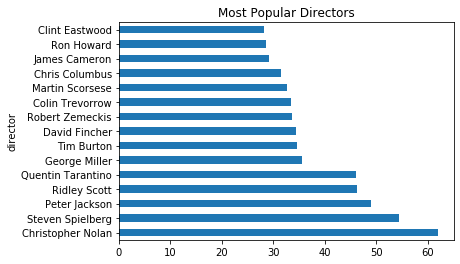

In [19]:
# Creating the bar chart for the top 15 directors by popularity with the x and y labels
dir_list2 = new_df2.nlargest(n = 15)
dir_list2.plot(kind = 'barh', title = 'Most Popular Directors')
plt.xlabel = ('director')
plt.ylabel = ('Popularity' )

In [17]:
# This graph showcases that the popularity of the directors vary siginficantly and that the differance between the top 5 and the 
# rest of the directors is noticeable

<a id='conclusions'></a>
## Conclusions

## Findings
## The list of the highest revenue directors are :
1. Steven Spielberg
2. Peter Jackson       
3. James Cameron        
4. Michael Bay          
5. Christopher Nolan    
6. David Yates          
7. Robert Zemeckis     
8. Chris Columbus       
9. Tim Burton           
10. Ridley Scott         
11. J.J. Abrams          
12. Gore Verbinski       
13. Ron Howard           
14. Roland Emmerich      
15. George Lucas    
## The list of the most popular directors are :
1. Christopher Nolan    
2. Steven Spielberg     
3. Peter Jackson        
4. Ridley Scott         
5. Quentin Tarantino    
6. George Miller        
7. Tim Burton           
8. David Fincher        
9. Robert Zemeckis      
10. Colin Trevorrow      
11. Martin Scorsese      
12. Chris Columbus      
13. James Cameron        
14. Ron Howard           
15. Clint Eastwood       
Some of the limitations were that the data set doesn't include all the directors in the world and that some of movies didn't have the director name in it so they were dropped. Also, not all of the movies are avalible in the data set so maybe a director has 10 movies but not all of them are in the data set so the results are not completly 100% accurate.